In [13]:
def convert_to_polygon(box):
    x, y, width, height = box

    # Calculate the coordinates of the four corners
    x1, y1 = x, y
    x2, y2 = x + width, y
    x3, y3 = x + width, y + height
    x4, y4 = x, y + height

    # Create a list of points representing the polygon
    polygon = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]

    return polygon

# Example usage:
box = [100, 200, 80, 40]
polygon = convert_to_polygon(box)
print("Polygon:", polygon)


Polygon: [(100, 200), (180, 200), (180, 240), (100, 240)]


In [32]:
polygon

[(100, 200), (180, 200), (180, 240), (100, 240)]

In [34]:
[(323.5355339059327, 193.18019484660536),
 (351.81980515339467, 221.46446609406726),
 (316.4644660940673, 256.81980515339467),
 (288.18019484660533, 228.53553390593274)]

[(323.5355339059327, 193.18019484660536),
 (351.81980515339467, 221.46446609406726),
 (316.4644660940673, 256.81980515339467),
 (288.18019484660533, 228.53553390593274)]

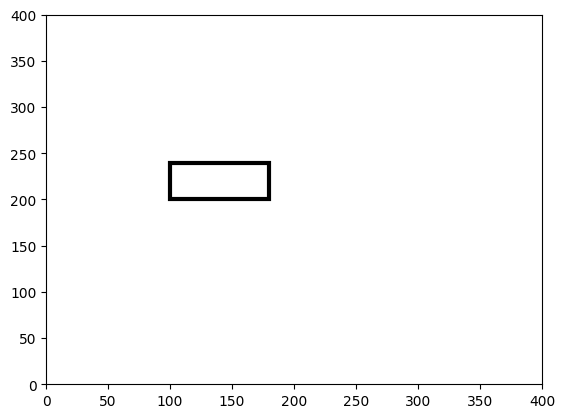

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def draw_polygon(polygon):
    y = np.array(polygon)
    p = Polygon(y, facecolor = 'k',fill= None, lw=3)

    fig,ax = plt.subplots()

    ax.add_patch(p)
    ax.set_xlim([0,400])
    ax.set_ylim([0,400])
    plt.show()

#--- draw_poly
draw_polygon(polygon)

In [19]:
# rotate box 
import math
print(polygon)

angle = 30
angle_radians = math.radians(angle)

rotate_box =[
    [math.cos(angle_radians), -math.sin(angle_radians)],
    [math.cos(angle_radians), math.sin(angle_radians)]
]

[(100, 200), (180, 200), (180, 240), (100, 240)]


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def rotate_point(point, center, angle_degrees):
    angle_radians = np.radians(angle_degrees)
    x, y = point
    cx, cy = center

    new_x = (x - cx) * np.cos(angle_radians) - (y - cy) * np.sin(angle_radians) + cx
    new_y = (x - cx) * np.sin(angle_radians) + (y - cy) * np.cos(angle_radians) + cy

    return [new_x, new_y]

def rotate_bounding_box(box, center, angle_degrees):
    rotated_box = [rotate_point(point, center, angle_degrees) for point in box]
    return rotated_box

# Original bounding box
original_box = [[300, 200], [340, 200], [340, 250], [300, 250]]

# Rotation center (you can change this to rotate around a different point)
rotation_center = [320, 225]

# Rotation angle in degrees
rotation_angle = 45

# Rotate the bounding box
rotated_box = rotate_bounding_box(original_box, rotation_center, rotation_angle)

# Plot the original and rotated bounding boxes
original_xs, original_ys = zip(*original_box + [original_box[0]])
rotated_xs, rotated_ys = zip(*rotated_box + [rotated_box[0]])

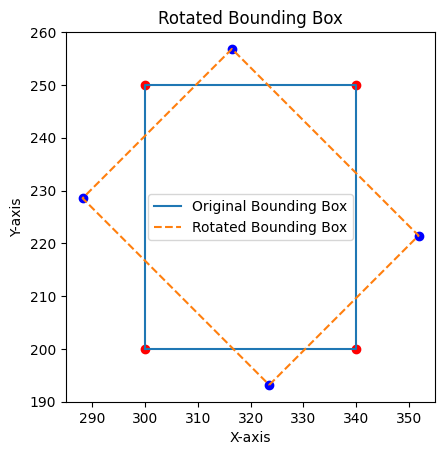

In [24]:
plt.figure()

plt.plot(original_xs, original_ys, label='Original Bounding Box')
plt.plot(rotated_xs, rotated_ys, label='Rotated Bounding Box', linestyle='--')

plt.scatter(*zip(*original_box), color='red')  # Mark original box vertices
plt.scatter(*zip(*rotated_box), color='blue')  # Mark rotated box vertices

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Rotated Bounding Box')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()


In [31]:
original_box

[[300, 200], [340, 200], [340, 250], [300, 250]]

In [27]:
rotated_box

[[323.5355339059327, 193.18019484660536],
 [351.81980515339467, 221.46446609406726],
 [316.4644660940673, 256.81980515339467],
 [288.18019484660533, 228.53553390593274]]

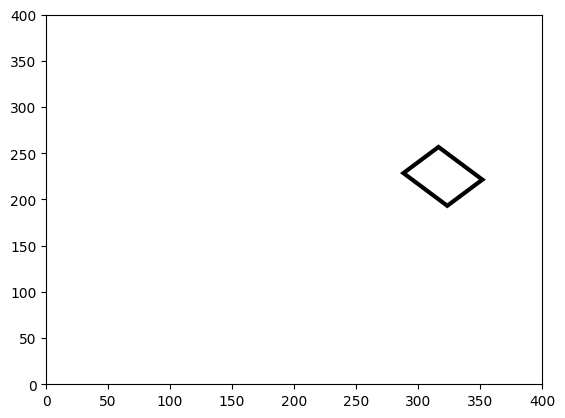

In [38]:
rotated_polygon = [(rotated_box[0]),(rotated_box[1]),(rotated_box[2]),(rotated_box[3])]

draw_polygon(rotated_polygon)